In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

with open('pageviews.json') as fp:
    views = json.load(fp)


In [72]:
df = pd.read_csv("graph.csv",encoding='cp1252')

d = {'node':[],'hop':[]}
nodeset = set()
nodelist = []
x_axis = []
y_axis = []
c = 0

for index,row in df.iterrows():
    x = json.loads(row["edges_within_category"])
    for i in x["key"]:
        try:
            if views[row["node"]] == None or views[i]==None:
                raise Exception
            y_axis.append(views[row["node"]])
            x_axis.append(views[i])
            c += 1
        except:
            pass

    x = json.loads(row["edges_outside_category"])
    for i in x["key"]:
        try:
            if views[row["node"]] == None or views[i]==None:
                raise Exception
            y_axis.append(views[row["node"]])
            x_axis.append(views[i])
            c+=1
        except:
            pass
    # if c > 1:
    #     break

df = pd.DataFrame(data=d)

In [81]:
print(max(y_axis))

77976062


In [88]:
x = []
y = []
avg = np.average(y_axis)
for i in range(len(y_axis)):
    if y_axis[i] > 7000000:
        x.append(x_axis[i])
        y.append(y_axis[i])

print(avg)
print(len(x))

437090.9318350864
10455


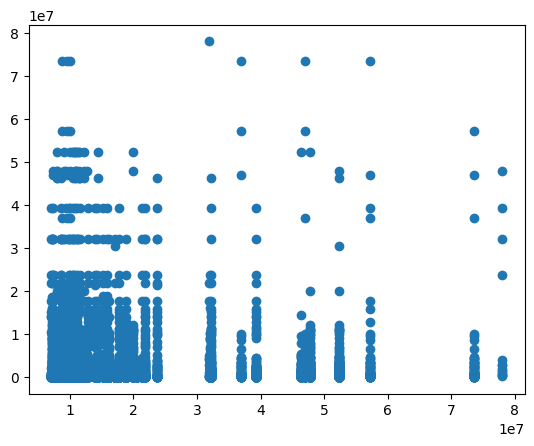

In [89]:
plt.scatter(y, x)
plt.show()

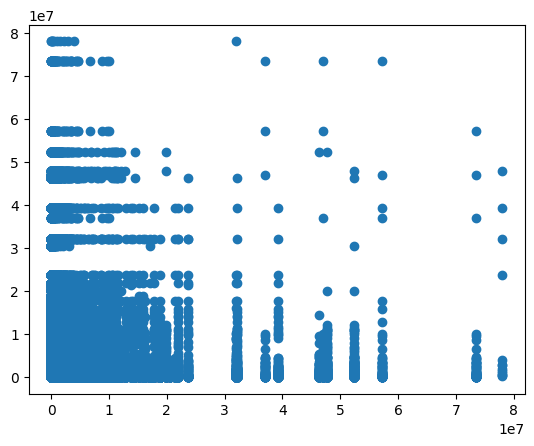

In [90]:
plt.scatter(y_axis, x_axis)
plt.show()

In [173]:
with open('page_ranks.json') as fp:
    ranks = json.load(fp)
x = []
y = []

for i in ranks:
    if views[i] == None:
        continue
    x.append(ranks[i])
    y.append(views[i])


In [174]:
Q1 = np.percentile(x, 25, method='midpoint')
Q3 = np.percentile(x, 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)
xupper = Q3+1.5*IQR
xlower = Q1-1.5*IQR
Q1 = np.percentile(y, 25, method='midpoint')
Q3 = np.percentile(y, 75, method='midpoint')
IQR = Q3 - Q1
yupper = Q3+1.5*IQR
ylower = Q1-1.5*IQR

px = []
vy = []
for i in ranks:
    if views[i] >= yupper or views[i] <= ylower:
        continue
    if ranks[i] >= xupper or ranks[i] <= xlower:
        continue
    px.append(ranks[i])
    vy.append(views[i])

5.0669322574544806e-05


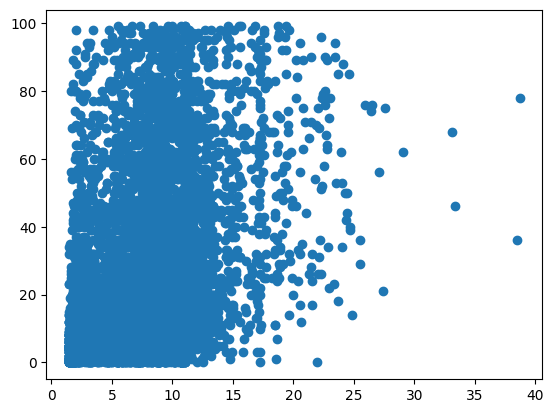

In [169]:
plt.scatter(x, y)
plt.show()

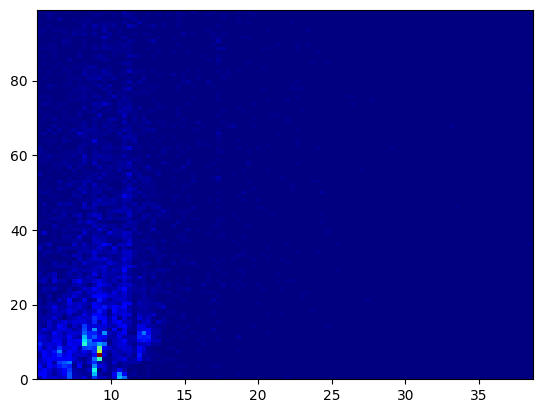

In [167]:
plt.hist2d(x, y, bins=(100, 100), cmap=plt.cm.jet)
plt.show()
